In [1]:
#Importing libraries and setting seed
seed = 45871
import pandas as pd
import numpy as np
import math
import statistics
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [2]:
# If not installed, install the arch library
#pip install arch

# Load file and add coloumns 

In [3]:
#Loading the data file
file_path = 'Test data_ascending.xlsx'
df = pd.read_excel(file_path)

# Filter the DataFrame to include data from 01/04/2008 onwards
start_date = '2008-04-03'
df = df[df['Date'] >= start_date]


In [4]:
# Calculating log returns
df['Log_Returns'] = (np.log(df['Last Price']) - np.log(df['Last Price'].shift(1)))*100

# Calculate absolute returns
df['Absolute_Returns'] = df['Last Price'] - df['Last Price'].shift(1)

# Calculate squared returns
df['Squared_Returns'] = df['Absolute_Returns'] ** 2

# Print the DataFrame to verify the results
print(df.head())


          Date  Last Price  Log_Returns  Absolute_Returns  Squared_Returns
755 2008-04-03       23.47          NaN               NaN              NaN
756 2008-04-04       23.31    -0.684056             -0.16           0.0256
757 2008-04-07       23.82     2.164311              0.51           0.2601
758 2008-04-08       23.51    -1.309970             -0.31           0.0961
759 2008-04-09       23.69     0.762716              0.18           0.0324


# Plot time series of Last Price with Phases 

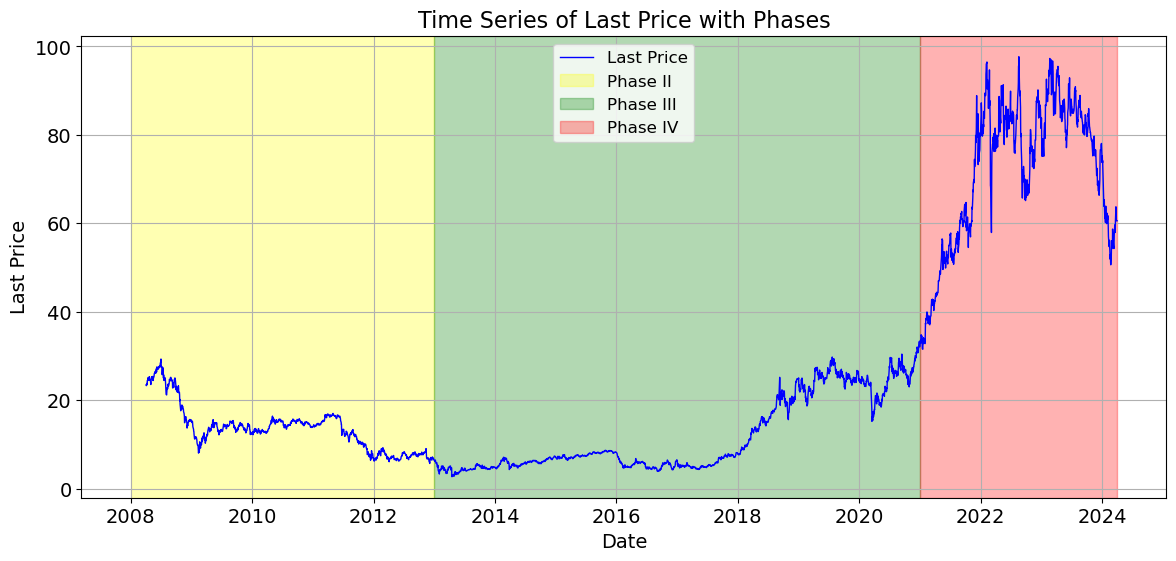

In [5]:
# Plotting the time series of the last price with phases highlighted
plt.figure(figsize=(14, 6))

# Plotting the entire time series
plt.plot(df['Date'], df['Last Price'], color='blue', linewidth=1, label='Last Price')

# Phase II: 2008-2021
phase_ii_start = '2008-01-01'
phase_ii_end = '2012-12-31'
plt.axvspan(phase_ii_start, phase_ii_end, color='yellow', alpha=0.3, label='Phase II')

# Phase III: 2013-2020
phase_iii_start = '2013-01-01'
phase_iii_end = '2020-12-31'
plt.axvspan(phase_iii_start, phase_iii_end, color='green', alpha=0.3, label='Phase III')

# Phase IV: 2021-today
phase_iv_start = '2021-01-01'
phase_iv_end = '2024-04-01'
plt.axvspan(phase_iv_start, phase_iv_end, color='red', alpha=0.3, label='Phase IV')

plt.title('Time Series of Last Price with Phases', fontsize = 16)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Last Price', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(True)
plt.legend(fontsize = 12)
plt.show()


# Plot Timer Series of Log Returns 

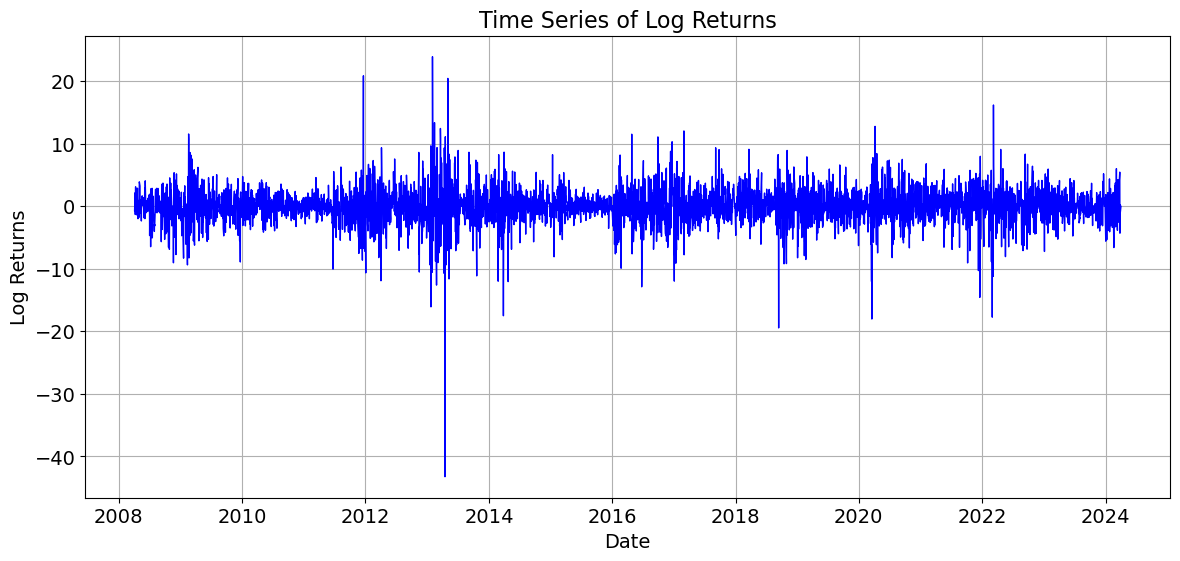

In [6]:
# Plotting the time series of log returns
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Log_Returns'], color='blue', linewidth=1)
plt.title('Time Series of Log Returns', fontsize = 16)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Log Returns', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(True)
plt.show()

# Summary statistics of log returns 

In [7]:
#### Calculate summary statistics of log returns
Minimum = round(df['Log_Returns'].min(), 3)
Maximum = round(df['Log_Returns'].max(), 3)
Mean = round(df['Log_Returns'].mean(), 3)
Standard_deviation = round(df['Log_Returns'].std(), 3)
Skewness = round(df['Log_Returns'].skew(), 3)
Kurtosis = round(df['Log_Returns'].kurtosis(), 3)

# Print the results
print("Minimum:", Minimum)
print("Maximum:", Maximum)
print("Mean:", Mean)
print("Standard deviation:", Standard_deviation)
print("Skewness:", Skewness)
print("Kurtosis:", Kurtosis)


Minimum: -43.242
Maximum: 23.923
Mean: 0.023
Standard deviation: 3.06
Skewness: -0.758
Kurtosis: 14.185


# Summary statistics of absolute returns 

In [8]:
# Calculate summary statistics of absolute returns
Minimum_absolute = round(df['Absolute_Returns'].min(), 3)
Maximum_absolute = round(df['Absolute_Returns'].max(), 3)
Mean_absolute = round(df['Absolute_Returns'].mean(), 3)
Standard_deviation_absolute = round(df['Absolute_Returns'].std(), 3)
Skewness_absolute = round(df['Absolute_Returns'].skew(), 3)
Kurtosis_absolute = round(df['Absolute_Returns'].kurtosis(), 3)

# Print the results
print("Minimum:", Minimum_absolute)
print("Maximum:", Maximum_absolute)
print("Mean:", Mean_absolute)
print("Standard deviation:", Standard_deviation_absolute)
print("Skewness:", Skewness_absolute)
print("Kurtosis:", Kurtosis_absolute)

Minimum: -13.29
Maximum: 10.19
Mean: 0.009
Standard deviation: 0.97
Skewness: -1.309
Kurtosis: 27.77


# Summary statistics of squared returns 

In [9]:
# Calculate summary statistics of squared returns
Minimum_squared = round(df['Squared_Returns'].min(), 3)
Maximum_squared = round(df['Squared_Returns'].max(), 3)
Mean_squared = round(df['Squared_Returns'].mean(), 3)
Standard_deviation_squared = round(df['Squared_Returns'].std(), 3)
Skewness_squared = round(df['Squared_Returns'].skew(), 3)
Kurtosis_squared = round(df['Squared_Returns'].kurtosis(), 3)

# Print the results
print("Minimum:", Minimum_squared)
print("Maximum:", Maximum_squared)
print("Mean:", Mean_squared)
print("Standard deviation:", Standard_deviation_squared)
print("Skewness:", Skewness_squared)
print("Kurtosis:", Kurtosis_squared)

Minimum: 0.0
Maximum: 176.624
Mean: 0.941
Standard deviation: 5.129
Skewness: 18.832
Kurtosis: 504.069


# Additional statistics on log returns 

In [10]:
# Calculate the Jarque-Bera test statistic and p-value for log returns
jarque_bera_statistic, p_value = stats.jarque_bera(df['Log_Returns'].dropna())

# Print the test statistic and p-value
print("Jarque-Bera test statistic:", jarque_bera_statistic)
print("p-value:", p_value)

Jarque-Bera test statistic: 34859.77330545859
p-value: 0.0


In [11]:
# Perform ADF test on log returns
adf_result = adfuller(df['Log_Returns'].dropna())

# Extract and print the results
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:', adf_result[4])

ADF Statistic: -11.242773909776732
p-value: 1.7899904874189912e-20
Critical Values: {'1%': -3.4319490730435906, '5%': -2.8622465828673254, '10%': -2.5671461208361164}


In [12]:
def hill_estimator(log_returns, tail_percentage):
   
    # Sort the log returns in descending order
    sorted_log_returns = np.sort(log_returns)[::-1]

    # Calculate the index corresponding to the top tail percentage
    k = int(len(log_returns) * tail_percentage)

    # Select the top k largest values
    top_values = sorted_log_returns[:k]

    # Calculate the sample mean of the top values
    sample_mean = np.mean(top_values)

    # Calculate the Hill estimator
    tail_index = 1 + (1 / np.mean(np.log(top_values / sample_mean)))

    return tail_index


log_returns = df['Log_Returns'].values[1:]  
tail_percentage = 0.05  # 5% tail
tail_index = hill_estimator(log_returns, tail_percentage)
print("Estimated tail index:", tail_index)


Estimated tail index: -17.903779485440523


# Plot Histogram on Log Returns 

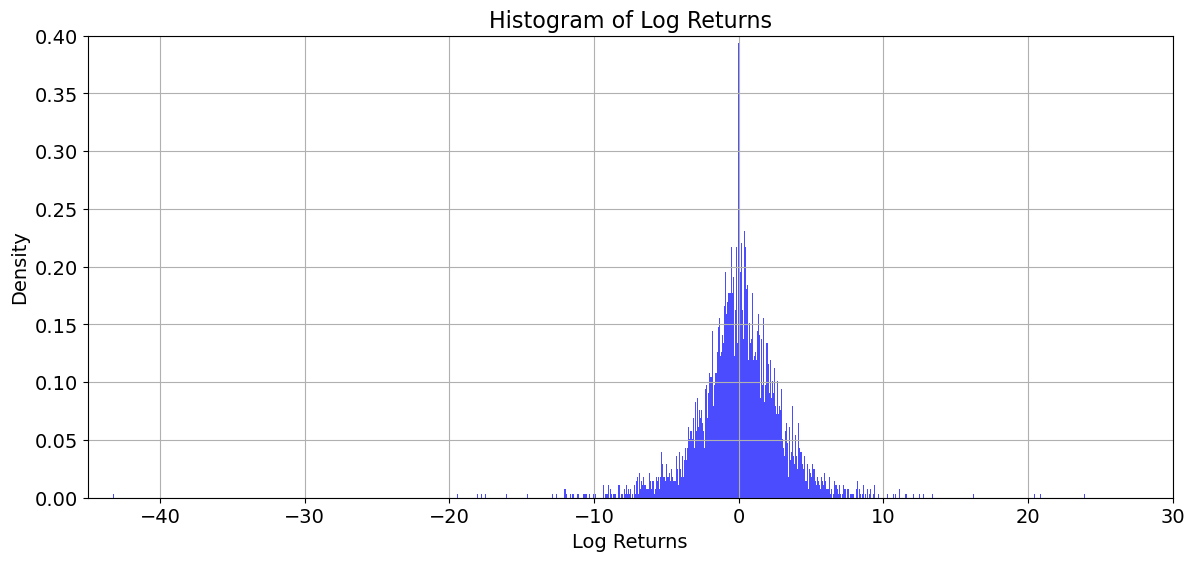

In [20]:
# Plot histogram of log returns
plt.figure(figsize=(14, 6))
plt.hist(df['Log_Returns'], bins=1000, density=True, color='blue', alpha=0.7)
plt.ylim(0, 0.4)
plt.xlim(-45, 30)
plt.title('Histogram of Log Returns', fontsize = 16)
plt.xlabel('Log Returns', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(True)
plt.show()

Estimating the GARCH(1,1) model using MLE

# Check for heteroscedacity 

In [14]:
# Exclude first and last observations with NaN values
df_clean = df.dropna().iloc[1:-1].reset_index(drop=True)

# Print the log returns data
print(df_clean['Log_Returns'])


0       2.164311
1      -1.309970
2       0.762716
3       3.116812
4      -0.245801
          ...   
4115    4.075296
4116    5.465136
4117   -4.295532
4118    0.245359
4119   -1.034577
Name: Log_Returns, Length: 4120, dtype: float64


In [15]:
from arch import arch_model

# Define the GARCH model 
model = arch_model(df_clean['Log_Returns'])

# Fit the model
result = model.fit()

# Perform ARCH-LM test for lags 1, 5, and 10 separately
lags = [1, 5, 10]
lm_test_results = []

for lag in lags:
    lm_test = result.arch_lm_test(lags=lag) 
    lm_test_results.append(lm_test)

# Display the results
for lag, lm_test in zip(lags, lm_test_results):
    print(f"ARCH-LM test result for lag {lag}:")
    print(lm_test)


Iteration:      1,   Func. Count:      6,   Neg. LLF: 21153.314890223835
Iteration:      2,   Func. Count:     14,   Neg. LLF: 1939539.9932194997
Iteration:      3,   Func. Count:     21,   Neg. LLF: 10884.51201628661
Iteration:      4,   Func. Count:     29,   Neg. LLF: 9859.829241762183
Iteration:      5,   Func. Count:     34,   Neg. LLF: 10565.396806140241
Iteration:      6,   Func. Count:     41,   Neg. LLF: 10288.7599266943
Iteration:      7,   Func. Count:     48,   Neg. LLF: 9858.540116842965
Iteration:      8,   Func. Count:     53,   Neg. LLF: 9858.514536141523
Iteration:      9,   Func. Count:     58,   Neg. LLF: 9858.51390831059
Iteration:     10,   Func. Count:     63,   Neg. LLF: 9858.513900138889
Iteration:     11,   Func. Count:     67,   Neg. LLF: 9858.51390014094
Optimization terminated successfully    (Exit mode 0)
            Current function value: 9858.513900138889
            Iterations: 11
            Function evaluations: 67
            Gradient evaluations: 11

# Plot graf to show Training and Testing period for data 

In [16]:
test_size = int(len(df) * 0.2)
df_train = df[:-test_size]
df_test = df[-test_size:]

df_train = df_train.dropna()
df_test = df_test.dropna()

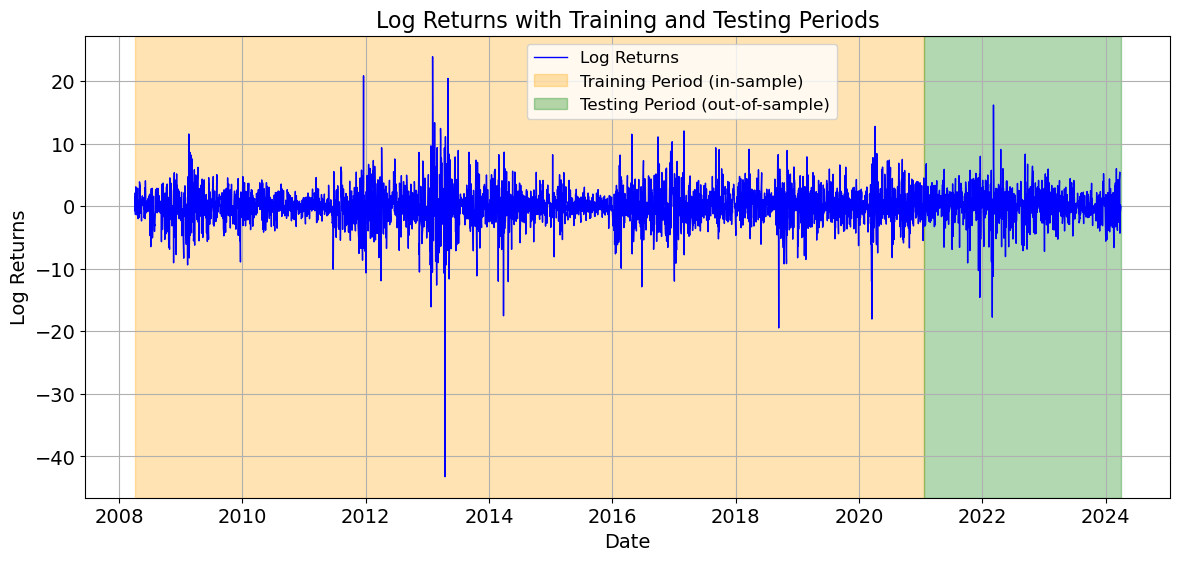

In [17]:
# Determine the dates for training and testing periods
train_end_date = df['Date'].iloc[len(df_train)]
test_start_date = df['Date'].iloc[len(df_train)]
test_end_date = df['Date'].iloc[-1]

# Plotting the time series of Log Returns with shaded areas for training and testing periods
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Log_Returns'], color='blue', linewidth=1, label='Log Returns')

# Add a shaded area to represent the training period
plt.axvspan(df['Date'].iloc[0], train_end_date, color='orange', alpha=0.3, label='Training Period (in-sample)')

# Add a shaded area to represent the testing period
plt.axvspan(test_start_date, test_end_date, color='green', alpha=0.3, label='Testing Period (out-of-sample)')

# Add a title and labels
plt.title('Log Returns with Training and Testing Periods', fontsize = 16)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Log Returns', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(True)

# Add a legend
plt.legend(loc='upper center', bbox_to_anchor=(0.55, 1.0), fontsize = 12)


# Show the plot
plt.show()
